# 2.1 Unsupervised Learning Algorithms

## Contents:

1. Import Libraries
2. Import Datasets
3. Scaling
4. Dendrograms
   - Belgrade/Ljubljana/Budapest - Single Method
   - Belgrade/Ljubljana/Budapest - Complete Method
   - Belgrade/Ljubljana/Budapest - Average Method
   - Belgrade/Ljubljana/Budapest - Ward Method
   - All stations - Single Method
   - All stations - Complete Method
   - All stations - Average Method
   - All stations - Ward Method
5. Principal Component Analysis (PCA)

## 1. Import Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## 2. Import Datasets

In [13]:
# Define path to dataset
path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Machine Learning/A1, Basics of Machine Learning for Analysts/ClimateWins/Data Sets/'

# Import dataset
df = pd.read_csv(os.path.join(path, 'temperature.csv'))
df_pleasant = pd.read_csv(os.path.join(path, 'pleasant_weather.csv'))

## 3. Scaling

In [15]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [16]:
# Reducing dataset to one year
df_2020 = df.loc[df['DATE'].astype(str).str[:4] == '2020']
df_2020.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
21915,20200101,1,0,1.7,0.87,1.0339,0.64,0.00,0,6.5,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21916,20200102,1,0,3.1,0.87,1.0316,0.65,0.00,0,6.5,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21917,20200103,1,7,2.2,0.81,1.0287,0.41,0.01,0,1.6,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21918,20200104,1,6,2.3,0.79,1.0341,0.29,0.14,0,0.9,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
21919,20200105,1,0,0.9,0.85,1.0367,0.67,0.00,0,6.6,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [17]:
# Drop columns that are not in answers dataset
df_dropped = df_2020.drop(df_2020.columns[df_2020.columns.str.contains('DATE|MONTH|GDANSK|ROMA|TOURS|Unnamed: 0', regex=True)], axis=1)

In [18]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_dropped)

# Convert to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_dropped.columns)

print(df_scaled.head())

   BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0          -1.960538         -0.321292        1.201295        1.910115   
1          -1.960538          1.025927        1.201295        1.634160   
2           0.875655          0.159857        0.764099        1.286217   
3           0.470485          0.256087        0.618367        1.934111   
4          -1.960538         -1.091132        1.055563        2.246060   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0               -0.711243            -0.486323               0.0   
1               -0.700149            -0.486323               0.0   
2               -0.966410            -0.460008               0.0   
3               -1.099541            -0.117914               0.0   
4               -0.677960            -0.486323               0.0   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_cloud_cover  \
0        0.185369        -1.822856       -1.817976  ...          

## 4. Dendrograms

### Belgrade/Ljubljana/Budapest - Single Method

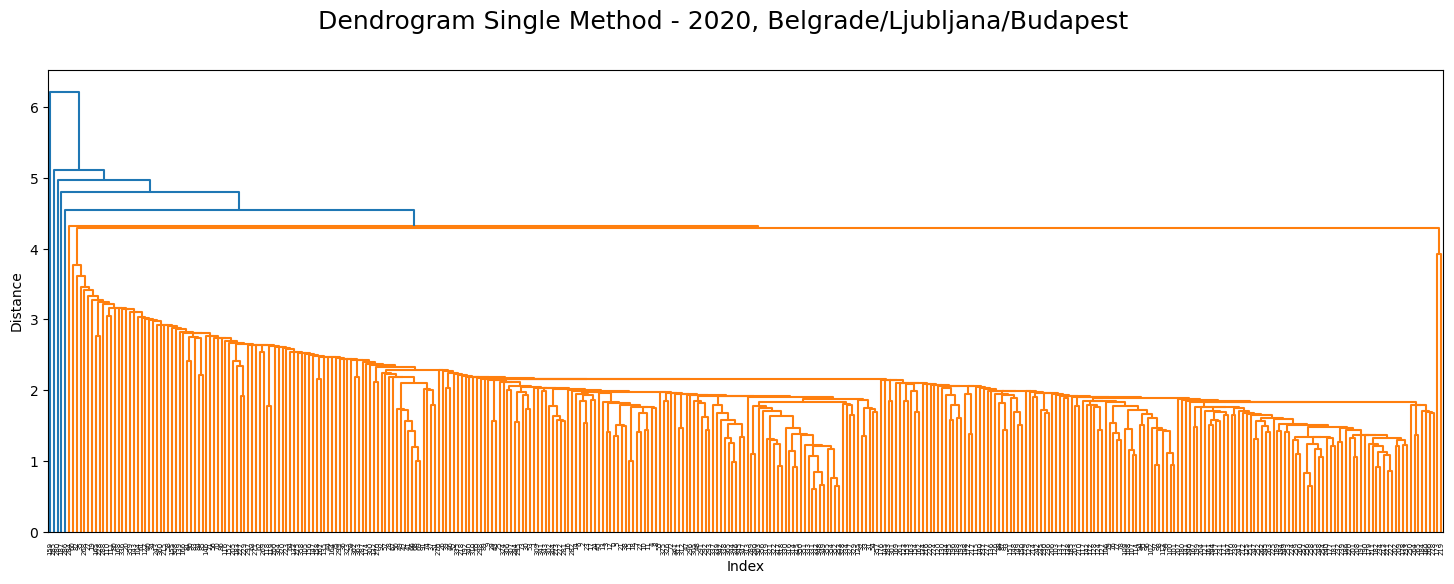

In [21]:
# Select three stations from the dataset
selected_stations = df_scaled.filter(regex='^BELGRADE|^LJUBLJANA|^BUDAPEST')

# Generate and display the dendrogram using the Single linkage matrix
distance_single = hierarchy.linkage(selected_stations, method="single")

plt.figure(figsize=(18, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method - 2020, Belgrade/Ljubljana/Budapest", fontsize=18)
plt.show()

### Belgrade/Ljubljana/Budapest - Complete Method

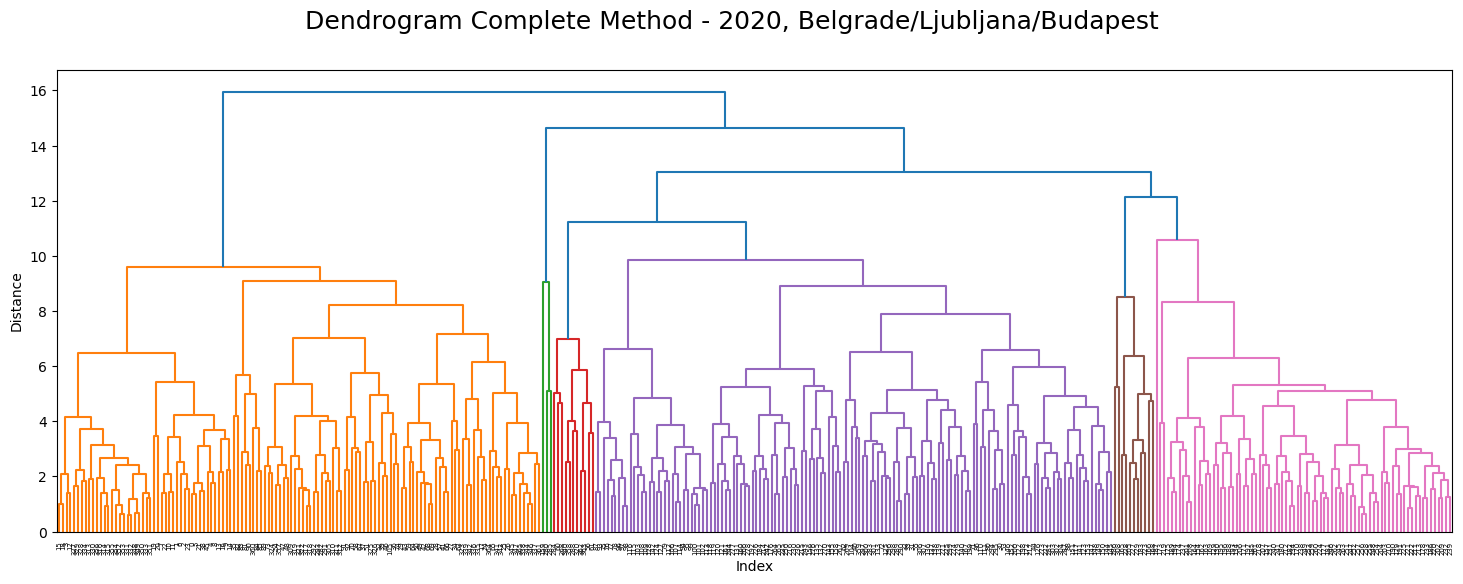

In [23]:
# Generate and display the dendrogram using the Complete linkage matrix
distance_complete = hierarchy.linkage(selected_stations, method="complete")

plt.figure(figsize=(18, 6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method - 2020, Belgrade/Ljubljana/Budapest", fontsize=18)
plt.show()

### Belgrade/Ljubljana/Budapest - Average Method

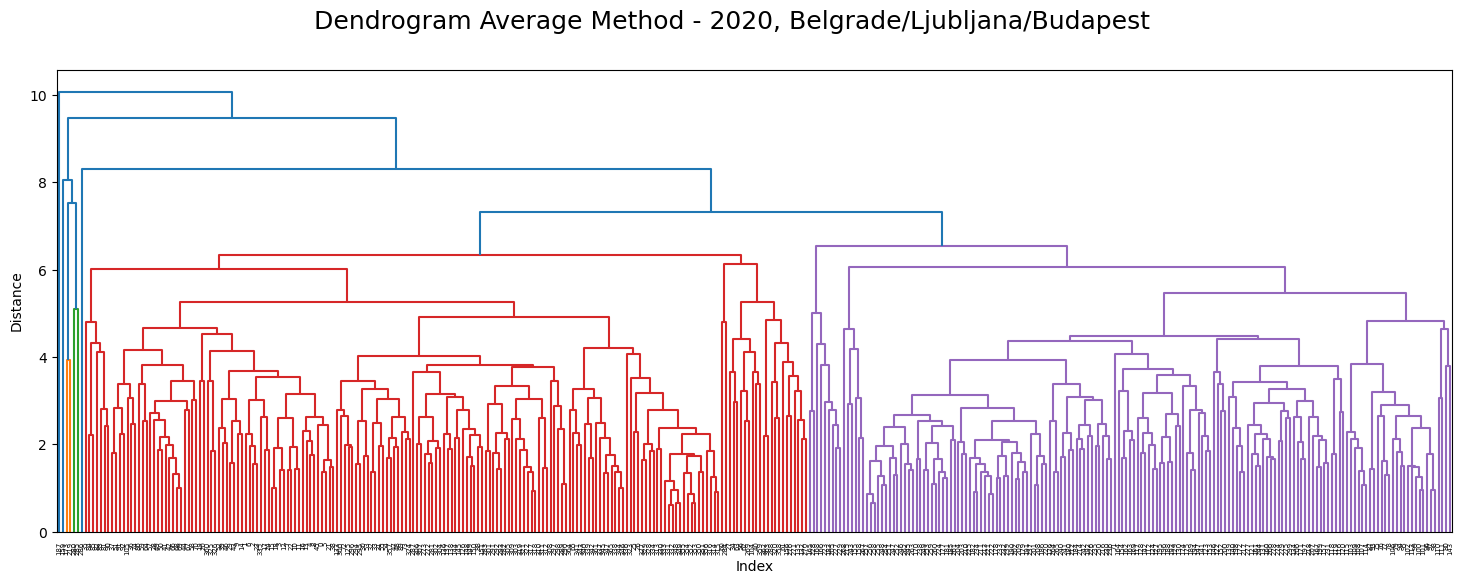

In [25]:
# Generate and display the dendrogram using the Average linkage matrix
distance_average = hierarchy.linkage(selected_stations, method="average")

plt.figure(figsize=(18, 6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method - 2020, Belgrade/Ljubljana/Budapest", fontsize=18)
plt.show()

### Belgrade/Ljubljana/Budapest - Ward Method

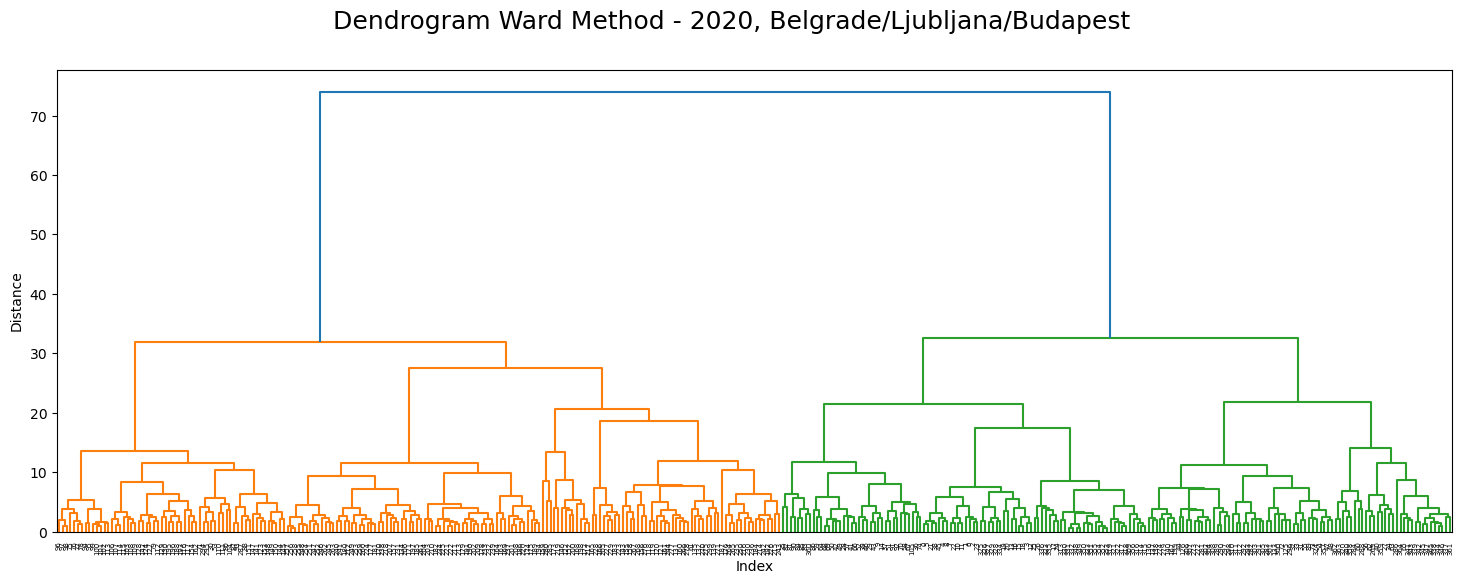

In [27]:
# Generate and display the dendrogram using the Ward linkage matrix
distance_ward = hierarchy.linkage(selected_stations, method="ward")

plt.figure(figsize=(18, 6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method - 2020, Belgrade/Ljubljana/Budapest", fontsize=18)
plt.show()

### All stations - Single Method

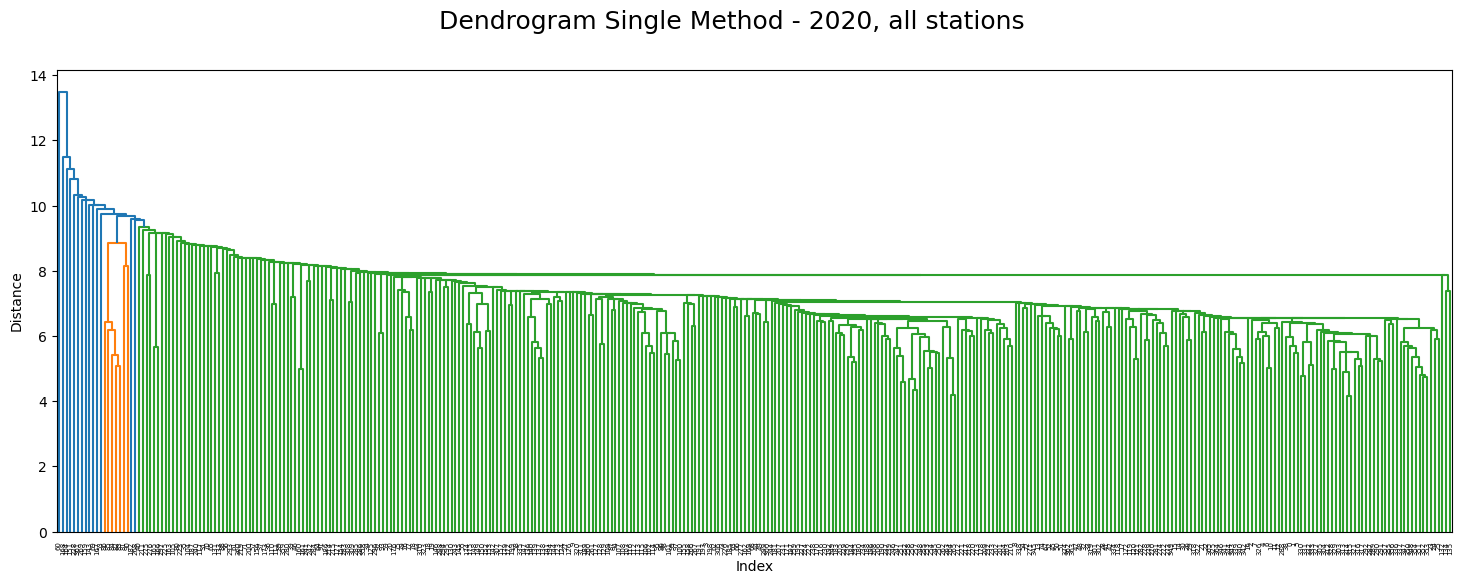

In [29]:
# Generate and display the dendrogram using the Single linkage matrix
distance_single = hierarchy.linkage(df_scaled, method="single")

plt.figure(figsize=(18, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method - 2020, all stations", fontsize=18)
plt.show()

### All stations - Complete Method

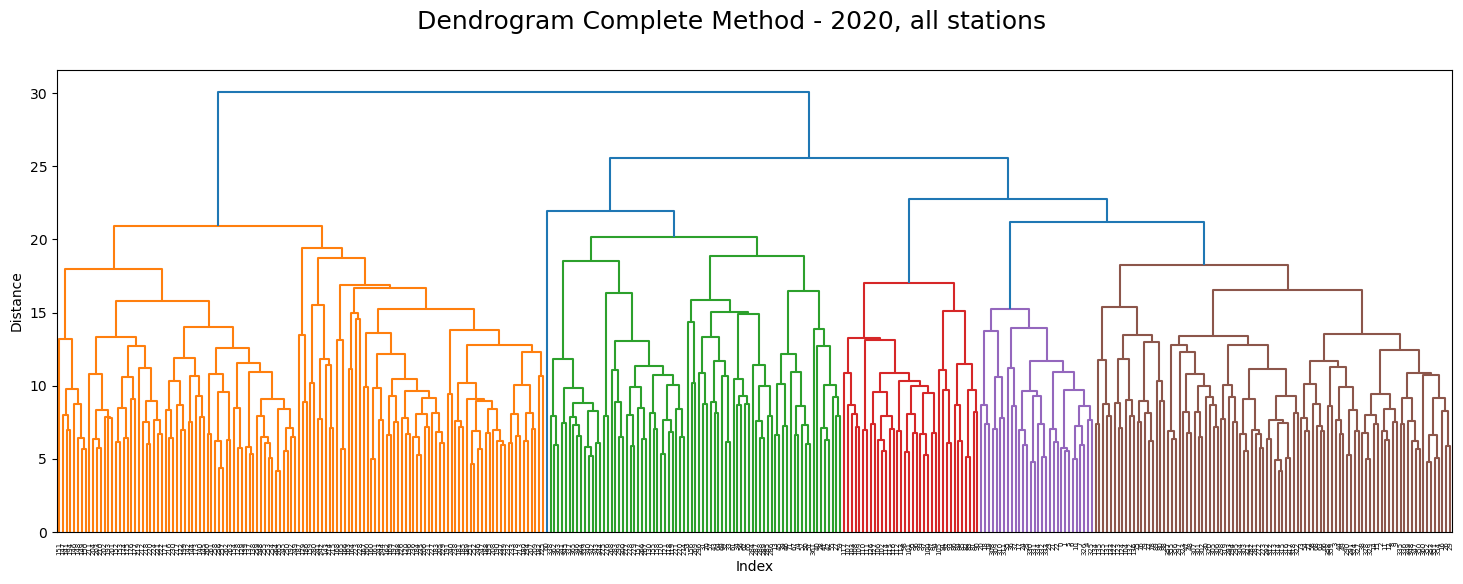

In [31]:
# Generate and display the dendrogram using the Complete linkage matrix
distance_complete = hierarchy.linkage(df_scaled, method="complete")

plt.figure(figsize=(18, 6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method - 2020, all stations", fontsize=18)
plt.show()

### All stations - Average Method

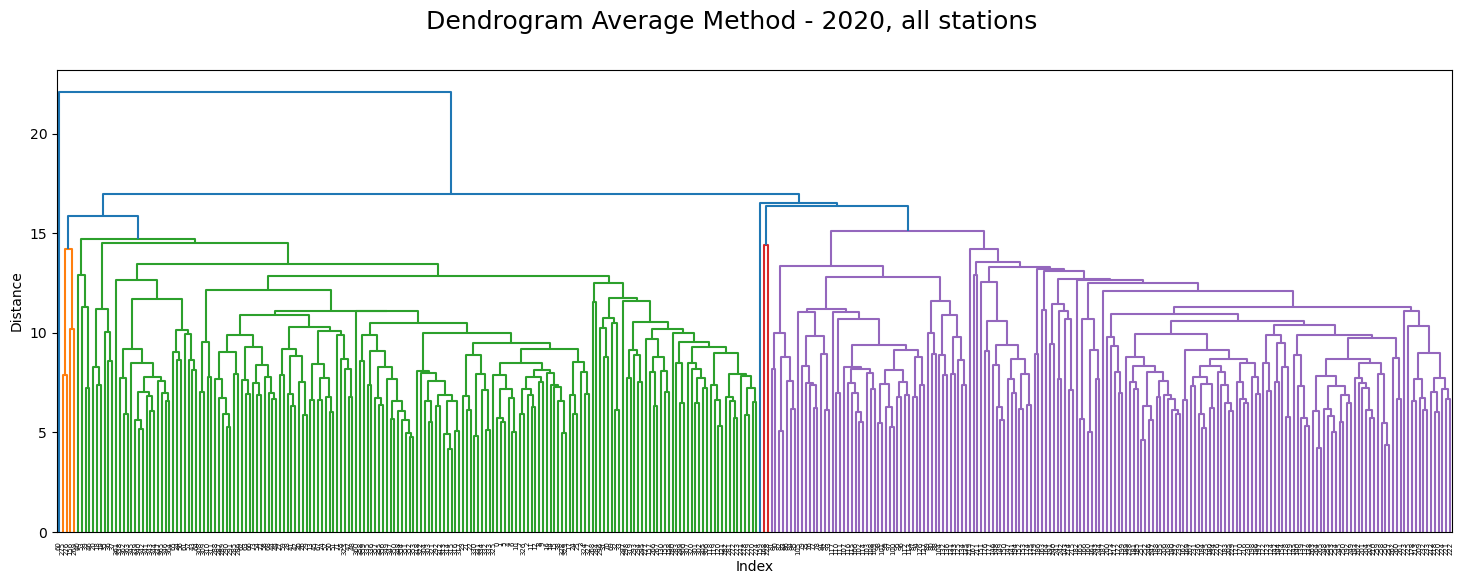

In [33]:
# Generate and display the dendrogram using the Average linkage matrix
distance_average = hierarchy.linkage(df_scaled, method="average")

plt.figure(figsize=(18, 6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method - 2020, all stations", fontsize=18)
plt.show()

### All stations - Ward Method

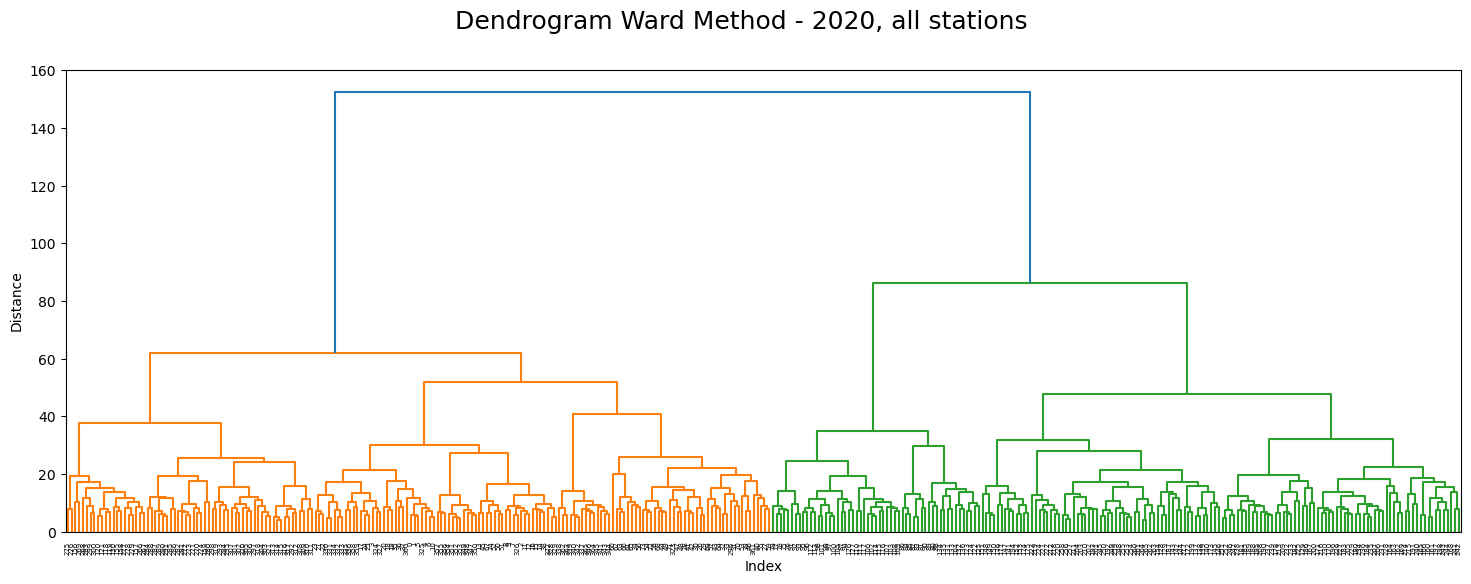

In [35]:
# Generate and display the dendrogram using the Ward linkage matrix
distance_ward = hierarchy.linkage(df_scaled, method="ward")

plt.figure(figsize=(18, 6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method - 2020, all stations", fontsize=18)
plt.show()

## 5. Principal Component Analysis (PCA)

In [37]:
# Run the PCA model, reducing to 11 measurements
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(df_scaled)
principalComponents

array([[ -9.53334475,   5.49645216,  -4.3628319 , ...,   2.02960886,
         -0.2794925 ,  -0.53167876],
       [ -9.51792278,   2.89924461,  -4.54408124, ...,   1.28149627,
          0.49378773,  -1.87755613],
       [ -8.63959195,   0.94173203,  -2.72910497, ...,   0.98207273,
          1.11628992,  -1.67113391],
       ...,
       [ -9.68226239,  -5.65670398,   5.33553988, ...,   0.93274435,
          1.2064892 ,  -1.95715306],
       [ -9.41008846,  -3.47789107,   2.70628922, ...,  -0.24082871,
          0.91600973,  -0.93727644],
       [-10.610452  ,  -2.41093481,   1.89068946, ...,   1.34206691,
         -0.23519655,   0.85543242]])

In [38]:
# Create a new DataFrame with the principal components
dfPCA = pd.DataFrame(principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
dfPCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-9.533345,5.496452,-4.362832,-2.351609,0.473123,0.676794,-1.508808,-1.717831,2.029609,-0.279493,-0.531679
1,-9.517923,2.899245,-4.544081,-0.936284,0.535184,-0.267537,-0.765591,-0.580001,1.281496,0.493788,-1.877556
2,-8.639592,0.941732,-2.729105,0.003524,1.510660,-1.296825,2.332489,0.491004,0.982073,1.116290,-1.671134
3,-8.772082,1.413648,-0.749654,-3.783869,4.213244,-0.971272,-0.342824,-0.335588,0.427018,1.382305,-1.824388
4,-8.918966,3.574197,-4.123982,-2.893708,2.459150,-0.852831,-2.923163,-0.476297,0.011813,-1.059476,-0.003284
...,...,...,...,...,...,...,...,...,...,...,...
361,-11.501655,-5.042795,2.160186,7.421216,-2.050336,-2.122958,-0.702748,2.629259,1.576691,-0.909451,-0.873114
362,-10.241360,-7.785360,6.637982,1.890900,-4.592612,3.113447,-3.997573,0.555595,1.833314,0.591395,-2.169986
363,-9.682262,-5.656704,5.335540,1.686037,-3.094343,2.871834,-2.602351,-0.265812,0.932744,1.206489,-1.957153
364,-9.410088,-3.477891,2.706289,-0.105671,-1.352610,1.711802,-2.613653,-0.170559,-0.240829,0.916010,-0.937276


In [39]:
# Export PCA dataframe
dfPCA.to_csv(os.path.join(path, 'Unsupervised', '2020_PCA.csv'), index=False)